C:\Users\Itsyu\AppData\Local\Temp\ipykernel_35156\2856479700.py:64: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax4.boxplot(normalized_data, labels=labels)


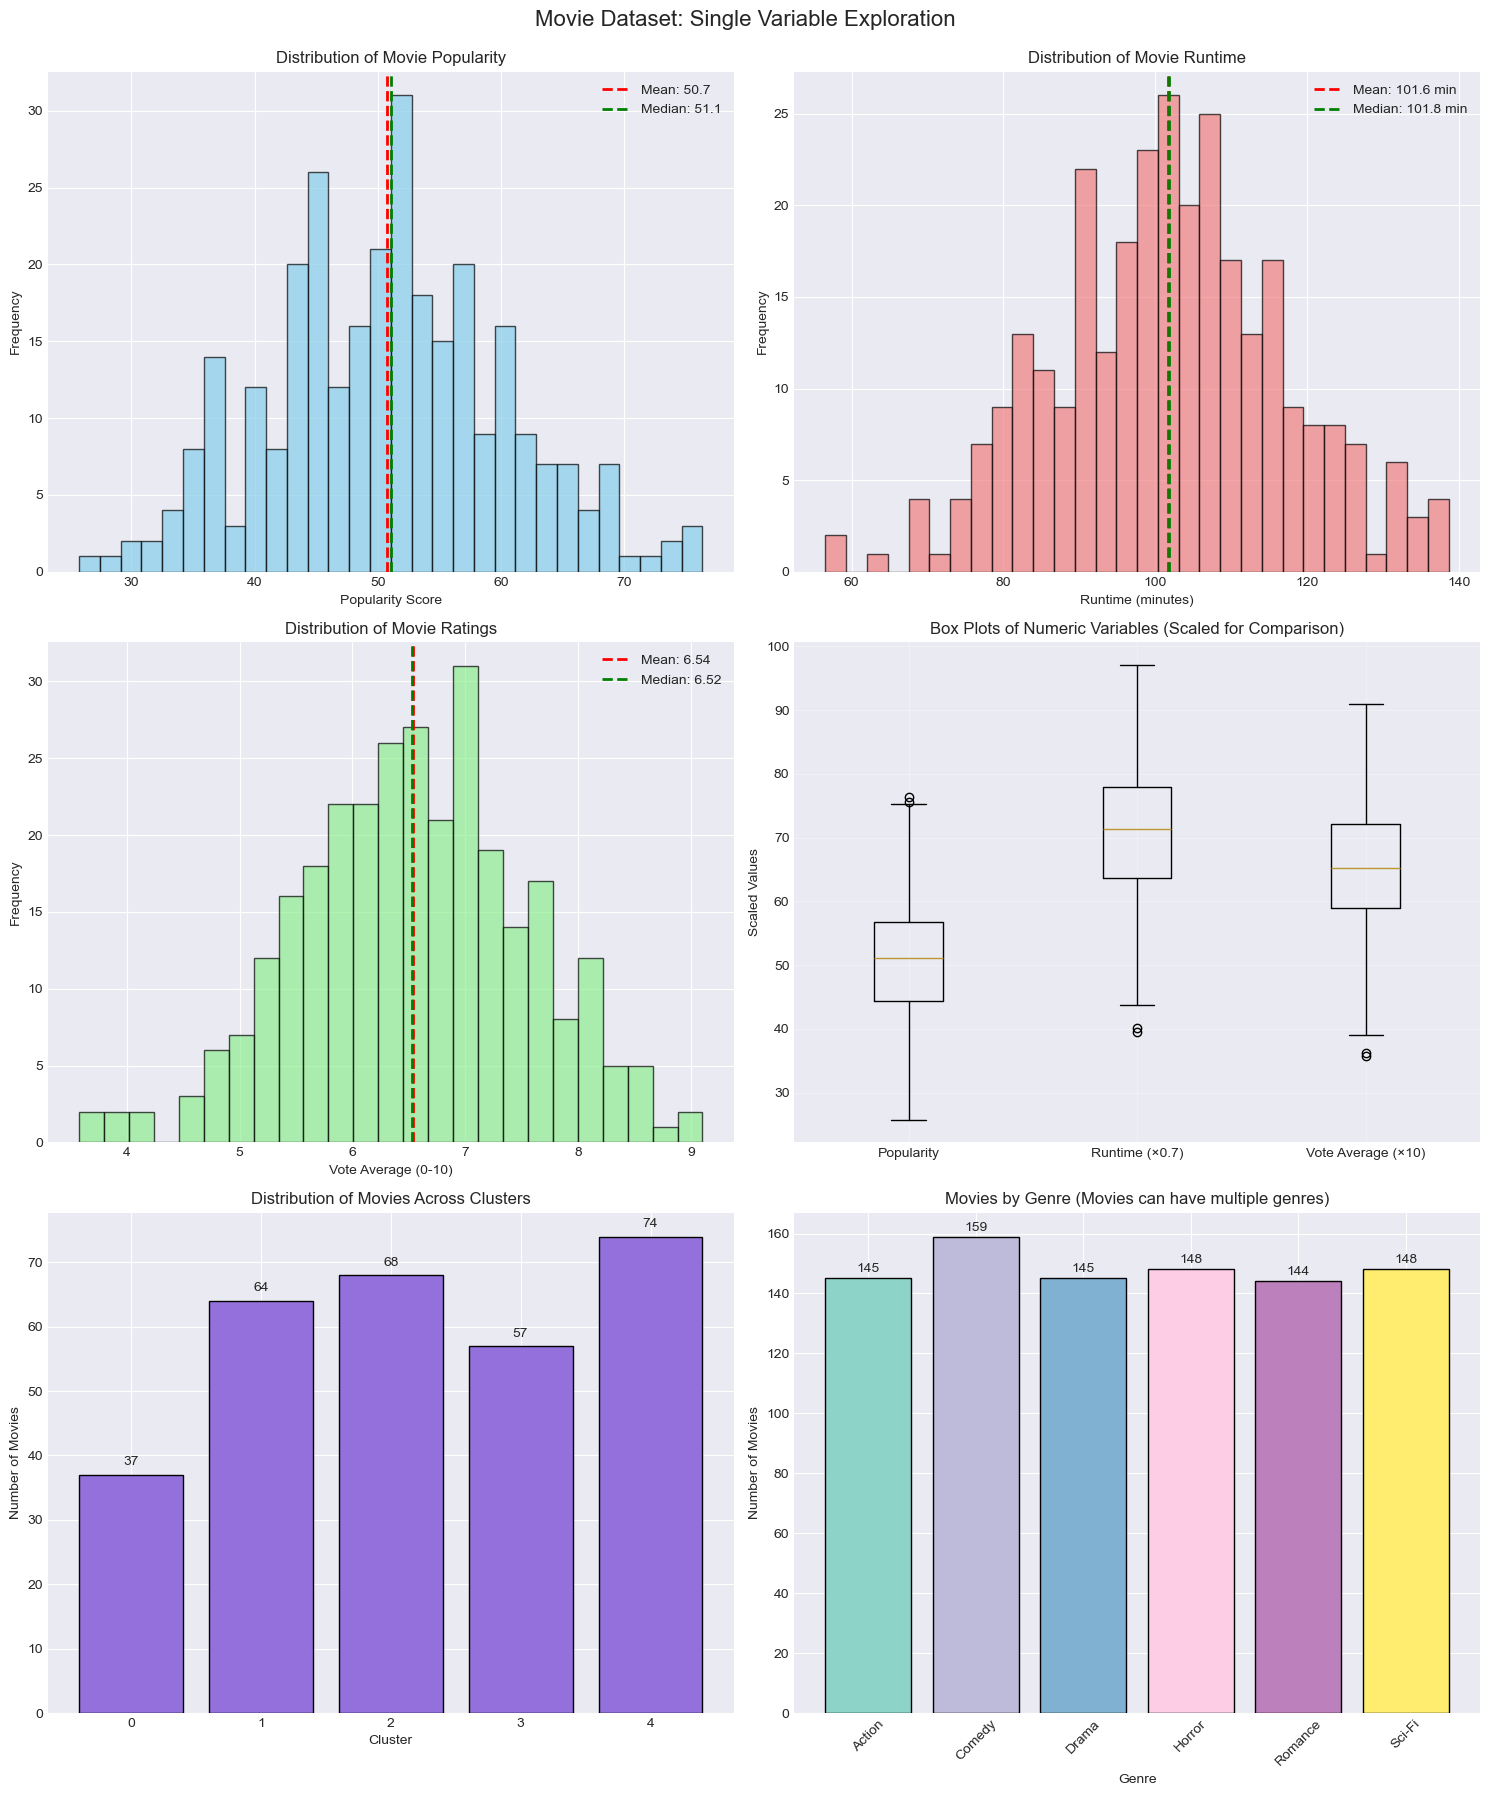

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('movie_cluster_data.csv')

# Create a figure with subplots for single variable exploration
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Movie Dataset: Single Variable Exploration', fontsize=16, y=0.995)

# 1. Popularity Distribution
ax1 = axes[0, 0]
ax1.hist(df['popularity'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Popularity Score')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Movie Popularity')
ax1.axvline(df['popularity'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {df["popularity"].mean():.1f}')
ax1.axvline(df['popularity'].median(), color='green', linestyle='dashed', linewidth=2, label=f'Median: {df["popularity"].median():.1f}')
ax1.legend()

# 2. Runtime Distribution
ax2 = axes[0, 1]
ax2.hist(df['runtime'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Runtime (minutes)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Movie Runtime')
ax2.axvline(df['runtime'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {df["runtime"].mean():.1f} min')
ax2.axvline(df['runtime'].median(), color='green', linestyle='dashed', linewidth=2, label=f'Median: {df["runtime"].median():.1f} min')
ax2.legend()

# 3. Vote Average Distribution
ax3 = axes[1, 0]
ax3.hist(df['vote_average'], bins=25, color='lightgreen', edgecolor='black', alpha=0.7)
ax3.set_xlabel('Vote Average (0-10)')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Movie Ratings')
ax3.axvline(df['vote_average'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {df["vote_average"].mean():.2f}')
ax3.axvline(df['vote_average'].median(), color='green', linestyle='dashed', linewidth=2, label=f'Median: {df["vote_average"].median():.2f}')
ax3.legend()

# 4. Box plots for all numeric variables
ax4 = axes[1, 1]
numeric_cols = ['popularity', 'runtime', 'vote_average']
# Normalize data for better visualization in same plot
normalized_data = []
labels = []
for col in numeric_cols:
    if col == 'vote_average':
        normalized_data.append(df[col] * 10)  # Scale vote_average to 0-100
        labels.append('Vote Average (×10)')
    elif col == 'runtime':
        normalized_data.append(df[col] * 0.7)  # Scale runtime for visualization
        labels.append('Runtime (×0.7)')
    else:
        normalized_data.append(df[col])
        labels.append('Popularity')

ax4.boxplot(normalized_data, labels=labels)
ax4.set_ylabel('Scaled Values')
ax4.set_title('Box Plots of Numeric Variables (Scaled for Comparison)')
ax4.grid(True, alpha=0.3)

# 5. Cluster Distribution
ax5 = axes[2, 0]
cluster_counts = df['cluster'].value_counts().sort_index()
ax5.bar(cluster_counts.index, cluster_counts.values, color='mediumpurple', edgecolor='black')
ax5.set_xlabel('Cluster')
ax5.set_ylabel('Number of Movies')
ax5.set_title('Distribution of Movies Across Clusters')
ax5.set_xticks(cluster_counts.index)
# Add value labels on bars
for i, v in enumerate(cluster_counts.values):
    ax5.text(cluster_counts.index[i], v + 1, str(v), ha='center', va='bottom')

# 6. Genre Distribution
ax6 = axes[2, 1]
genre_columns = ['is_Action', 'is_Comedy', 'is_Drama', 'is_Horror', 'is_Romance', 'is_Sci-Fi']
genre_counts = df[genre_columns].sum()
genre_names = [col.replace('is_', '') for col in genre_columns]
colors = plt.cm.Set3(np.linspace(0, 1, len(genre_names)))
bars = ax6.bar(genre_names, genre_counts, color=colors, edgecolor='black')
ax6.set_xlabel('Genre')
ax6.set_ylabel('Number of Movies')
ax6.set_title('Movies by Genre (Movies can have multiple genres)')
ax6.tick_params(axis='x', rotation=45)
# Add value labels on bars
for bar, count in zip(bars, genre_counts):
    ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load CSV dataset
df = pd.read_csv('movie_cluster_data.csv')

feature_columns = ['is_Action', 'is_Comedy', 'is_Drama', 'is_Horror', 'is_Romance', 
                  'is_Sci-Fi', 'popularity', 'runtime', 'vote_average']
X = df[feature_columns].values
y = df['cluster'].values
feature_names = feature_columns

print(f'Data shape: {X.shape}')
print(f'Feature names: {feature_names}')
print(f'Target (cluster) unique values: {np.unique(y)}')
print(f'Number of samples per cluster: {np.bincount(y)}')

Data shape: (300, 9)
Feature names: ['is_Action', 'is_Comedy', 'is_Drama', 'is_Horror', 'is_Romance', 'is_Sci-Fi', 'popularity', 'runtime', 'vote_average']
Target (cluster) unique values: [0 1 2 3 4]
Number of samples per cluster: [37 64 68 57 74]


In [9]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

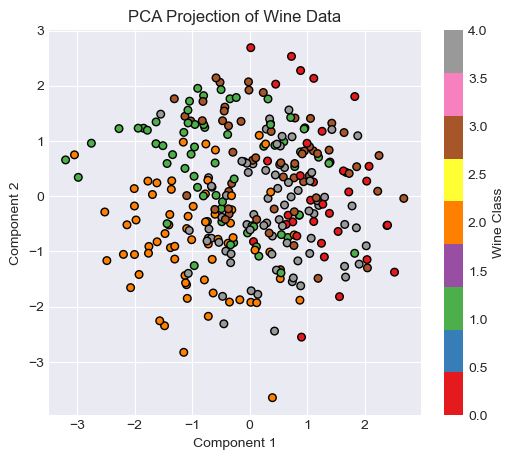

In [ ]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X_scaled)
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Set1', s=30, edgecolor='k')
plt.colorbar(label='Wine Class')
plt.title('PCA Projection of Movie Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

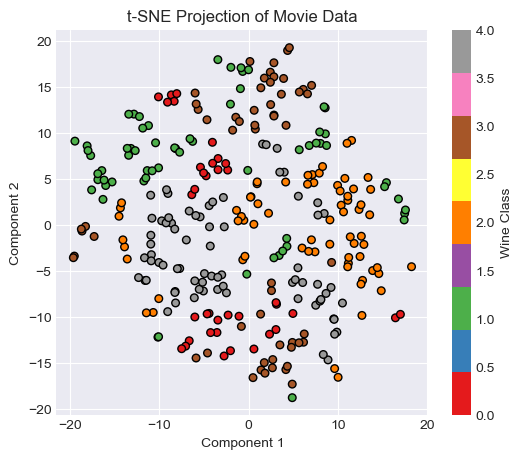

In [15]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='Set1', s=30, edgecolor='k')
plt.colorbar(label='Wine Class')
plt.title('t-SNE Projection of Movie Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()